# Szeged Weather Dataset CNN

In [16]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

## Importing the dataset

In [17]:
!cp "/content/drive/MyDrive/Colab Notebooks/Szeged/weatherHistory.csv" "/content/szegedweather.csv"

In [18]:
df = pd.read_csv('/content/szegedweather.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [19]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [20]:
df.index = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S')
df[:25]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,,
2006-04-01 00:00:00+02:00,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
2006-04-01 05:00:00+02:00,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
2006-04-01 06:00:00+02:00,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
2006-04-01 07:00:00+02:00,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
2006-04-01 08:00:00+02:00,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.


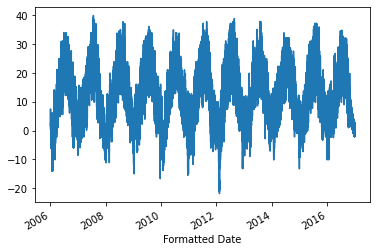

In [21]:
temp = df['Temperature (C)']
temp.plot()

In [22]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
#df[' _tempm'] = df[' _tempm'].interpolate()

In [23]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [24]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((96423, 30, 1), (96423,))

## Splitting the dataset

In [25]:
X_train1, y_train1 = X1[:77138], y1[:77138]
X_val1, y_val1 = X1[77138:86780], y1[77138:86780]
X_test1, y_test1 = X1[86780:], y1[86780:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((77138, 30, 1), (77138,), (9642, 30, 1), (9642,), (9643, 30, 1), (9643,))

## Building the network

In [26]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((30, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 29, 64)            192       
                                                                 
 flatten_1 (Flatten)         (None, 1856)              0         
                                                                 
 dense_2 (Dense)             (None, 8)                 14856     
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 15,057
Trainable params: 15,057
Non-trainable params: 0
_________________________________________________________________


In [27]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

## Training

In [28]:
history1 = model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
2411/2411 [==============================] - 8s 3ms/step - loss: 7.1471 - root_mean_squared_error: 2.6734 - val_loss: 1.9485 - val_root_mean_squared_error: 1.3959
Epoch 2/10
2411/2411 [==============================] - 10s 4ms/step - loss: 2.1335 - root_mean_squared_error: 1.4606 - val_loss: 1.4380 - val_root_mean_squared_error: 1.1992
Epoch 3/10
2411/2411 [==============================] - 7s 3ms/step - loss: 1.8840 - root_mean_squared_error: 1.3726 - val_loss: 1.3544 - val_root_mean_squared_error: 1.1638
Epoch 4/10
2411/2411 [==============================] - 8s 3ms/step - loss: 1.8299 - root_mean_squared_error: 1.3527 - val_loss: 1.2076 - val_root_mean_squared_error: 1.0989
Epoch 5/10
2411/2411 [==============================] - 8s 3ms/step - loss: 1.7912 - root_mean_squared_error: 1.3384 - val_loss: 1.2836 - val_root_mean_squared_error: 1.1330
Epoch 6/10
2411/2411 [==============================] - 6s 2ms/step - loss: 1.7681 - root_mean_squared_error: 1.3297 - val_loss: 

In [29]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

## Model results

In [30]:
train_predictions1 = model2.predict(X_train1).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y_train1})
train_results1

,Train Predictions,Actuals
0,7.284885,7.261111
1,8.454206,7.800000
2,9.391368,9.872222
3,11.853165,12.222222
4,14.020212,15.094444
...,...,...
77133,-0.068304,0.355556
77134,0.858059,1.138889
77135,1.849140,2.222222
77136,3.040870,2.916667


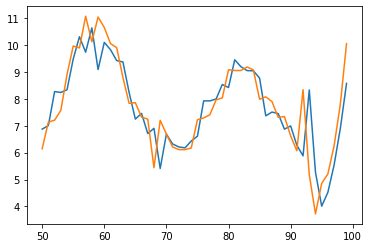

In [31]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [32]:
val_predictions1 = model2.predict(X_val1).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y_val1})
val_results1

,Val Predictions,Actuals
0,3.312176,2.933333
1,3.148906,4.022222
2,4.334086,3.883333
3,3.969058,3.838889
4,3.757983,2.966667
...,...,...
9637,1.774526,11.644444
9638,8.887969,11.577778
9639,10.782804,10.783333
9640,10.048275,10.488889


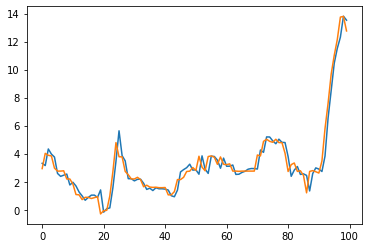

In [33]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [34]:
test_predictions1 = model2.predict(X_test1).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test1})
test_results1

,Test Predictions,Actuals
0,10.386349,10.716667
1,11.203559,10.027778
2,11.042573,11.022222
3,12.544080,12.583333
4,14.320528,14.983333
...,...,...
9638,26.535034,26.016667
9639,23.327269,24.583333
9640,22.209211,22.038889
9641,20.895205,21.522222


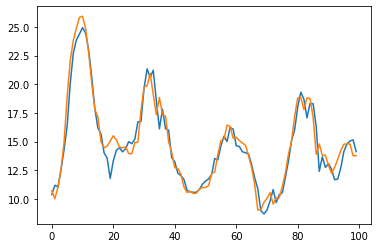

In [35]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

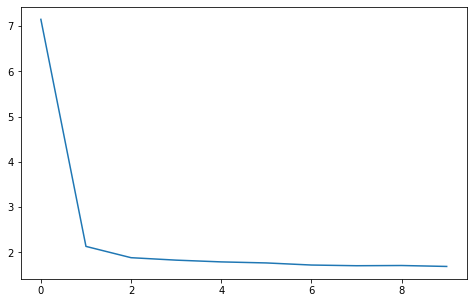

In [36]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

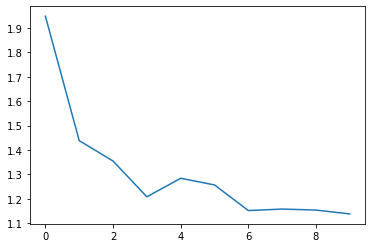

In [37]:
plt.plot(history1.history['val_loss'])

In [38]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions    Actuals
 0       10.386349  10.716667
 1       11.203559  10.027778
 2       11.042573  11.022222
 3       12.544080  12.583333
 4       14.320528  14.983333
 ...           ...        ...
 9638    26.535034  26.016667
 9639    23.327269  24.583333
 9640    22.209211  22.038889
 9641    20.895205  21.522222
 9642    20.304308  20.438889
 
 [9643 rows x 2 columns], 1.0279030980755626)

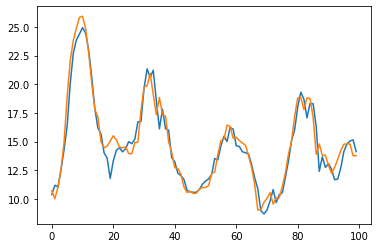

In [39]:
plot_predictions1(model2, X_test1, y_test1)